In [ ]:
# import packages
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DSBA 6211/HEMQ.csv')

In [ ]:
# data imputation
NA_names =['MORTDUE','VALUE','YOJ','DEROG',
           'DELINQ','CLAGE','NINQ','CLNO','DEBTINC']
df[NA_names]=df[NA_names].fillna(df[NA_names].mean())
df['REASON']=df['REASON'].fillna('DebtCon')
df['JOB']=df['JOB'].fillna('Other')
df.describe(include='all')

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5960.000000,5960.000000,5960,5960,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000
unique,NaN,NaN,NaN,NaN,2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,DebtCon,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,4180,2667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.199497,18607.969799,73760.817200,101776.048741,NaN,NaN,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,42481.395689,56843.931566,NaN,NaN,7.239301,0.794198,1.071002,83.563059,1.653046,9.948280,7.632713
min,0.000000,1100.000000,2063.000000,8000.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,48139.000000,66489.500000,NaN,NaN,3.000000,0.000000,0.000000,117.371430,0.000000,15.000000,30.763159
50%,0.000000,16300.000000,69529.000000,90000.000000,NaN,NaN,8.000000,0.000000,0.000000,178.076005,1.000000,21.000000,33.779915
75%,0.000000,23300.000000,88200.250000,119004.750000,NaN,NaN,12.000000,0.000000,0.449442,227.143058,2.000000,26.000000,37.949892


In [ ]:
# generate dummy and combine with the numeric variables together
dummy_data =pd.get_dummies(df[['REASON','JOB']], drop_first=True)
num_names=['LOAN','MORTDUE','VALUE','YOJ','DEROG',
           'DELINQ','CLAGE','NINQ','CLNO','DEBTINC']

X = pd.concat([df[num_names],dummy_data],axis=1)
X.describe(include='all')

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
count,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000
mean,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915,0.298658,0.159060,0.447483,0.214094,0.018289,0.032383
std,11207.480417,42481.395689,56843.931566,7.239301,0.794198,1.071002,83.563059,1.653046,9.948280,7.632713,0.457708,0.365763,0.497276,0.410227,0.134004,0.177029
min,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11100.000000,48139.000000,66489.500000,3.000000,0.000000,0.000000,117.371430,0.000000,15.000000,30.763159,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16300.000000,69529.000000,90000.000000,8.000000,0.000000,0.000000,178.076005,1.000000,21.000000,33.779915,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23300.000000,88200.250000,119004.750000,12.000000,0.000000,0.449442,227.143058,2.000000,26.000000,37.949892,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
y = df['BAD']

from sklearn.model_selection import train_test_split

X_train, X_val, y_train,y_val =train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
# tree 1 using the stopping rule
from sklearn import tree
from sklearn.tree import export_text

dtree = tree.DecisionTreeClassifier(max_depth=4, min_samples_split=30, random_state = 0) # Consequently, practical decision-tree learning algorithms are based on heuristic algorithms such as the greedy algorithm where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement.
dtree = dtree.fit(X_train,y_train)

In [ ]:
# text foramt of decision tree
r = export_text(dtree, feature_names=list(X_train.columns.values)) # column names
print(r)

|--- DELINQ <= 0.72
|   |--- DEBTINC <= 45.66
|   |   |--- DEBTINC <= 33.78
|   |   |   |--- VALUE <= 23921.00
|   |   |   |   |--- class: 1
|   |   |   |--- VALUE >  23921.00
|   |   |   |   |--- class: 0
|   |   |--- DEBTINC >  33.78
|   |   |   |--- DEBTINC <= 33.78
|   |   |   |   |--- class: 1
|   |   |   |--- DEBTINC >  33.78
|   |   |   |   |--- class: 0
|   |--- DEBTINC >  45.66
|   |   |--- class: 1
|--- DELINQ >  0.72
|   |--- DEBTINC <= 33.84
|   |   |--- DEBTINC <= 33.76
|   |   |   |--- DEBTINC <= 9.53
|   |   |   |   |--- class: 1
|   |   |   |--- DEBTINC >  9.53
|   |   |   |   |--- class: 0
|   |   |--- DEBTINC >  33.76
|   |   |   |--- CLAGE <= 390.62
|   |   |   |   |--- class: 1
|   |   |   |--- CLAGE >  390.62
|   |   |   |   |--- class: 0
|   |--- DEBTINC >  33.84
|   |   |--- DEBTINC <= 43.57
|   |   |   |--- DELINQ <= 4.50
|   |   |   |   |--- class: 0
|   |   |   |--- DELINQ >  4.50
|   |   |   |   |--- class: 1
|   |   |--- DEBTINC >  43.57
|   |   |   |--- cla

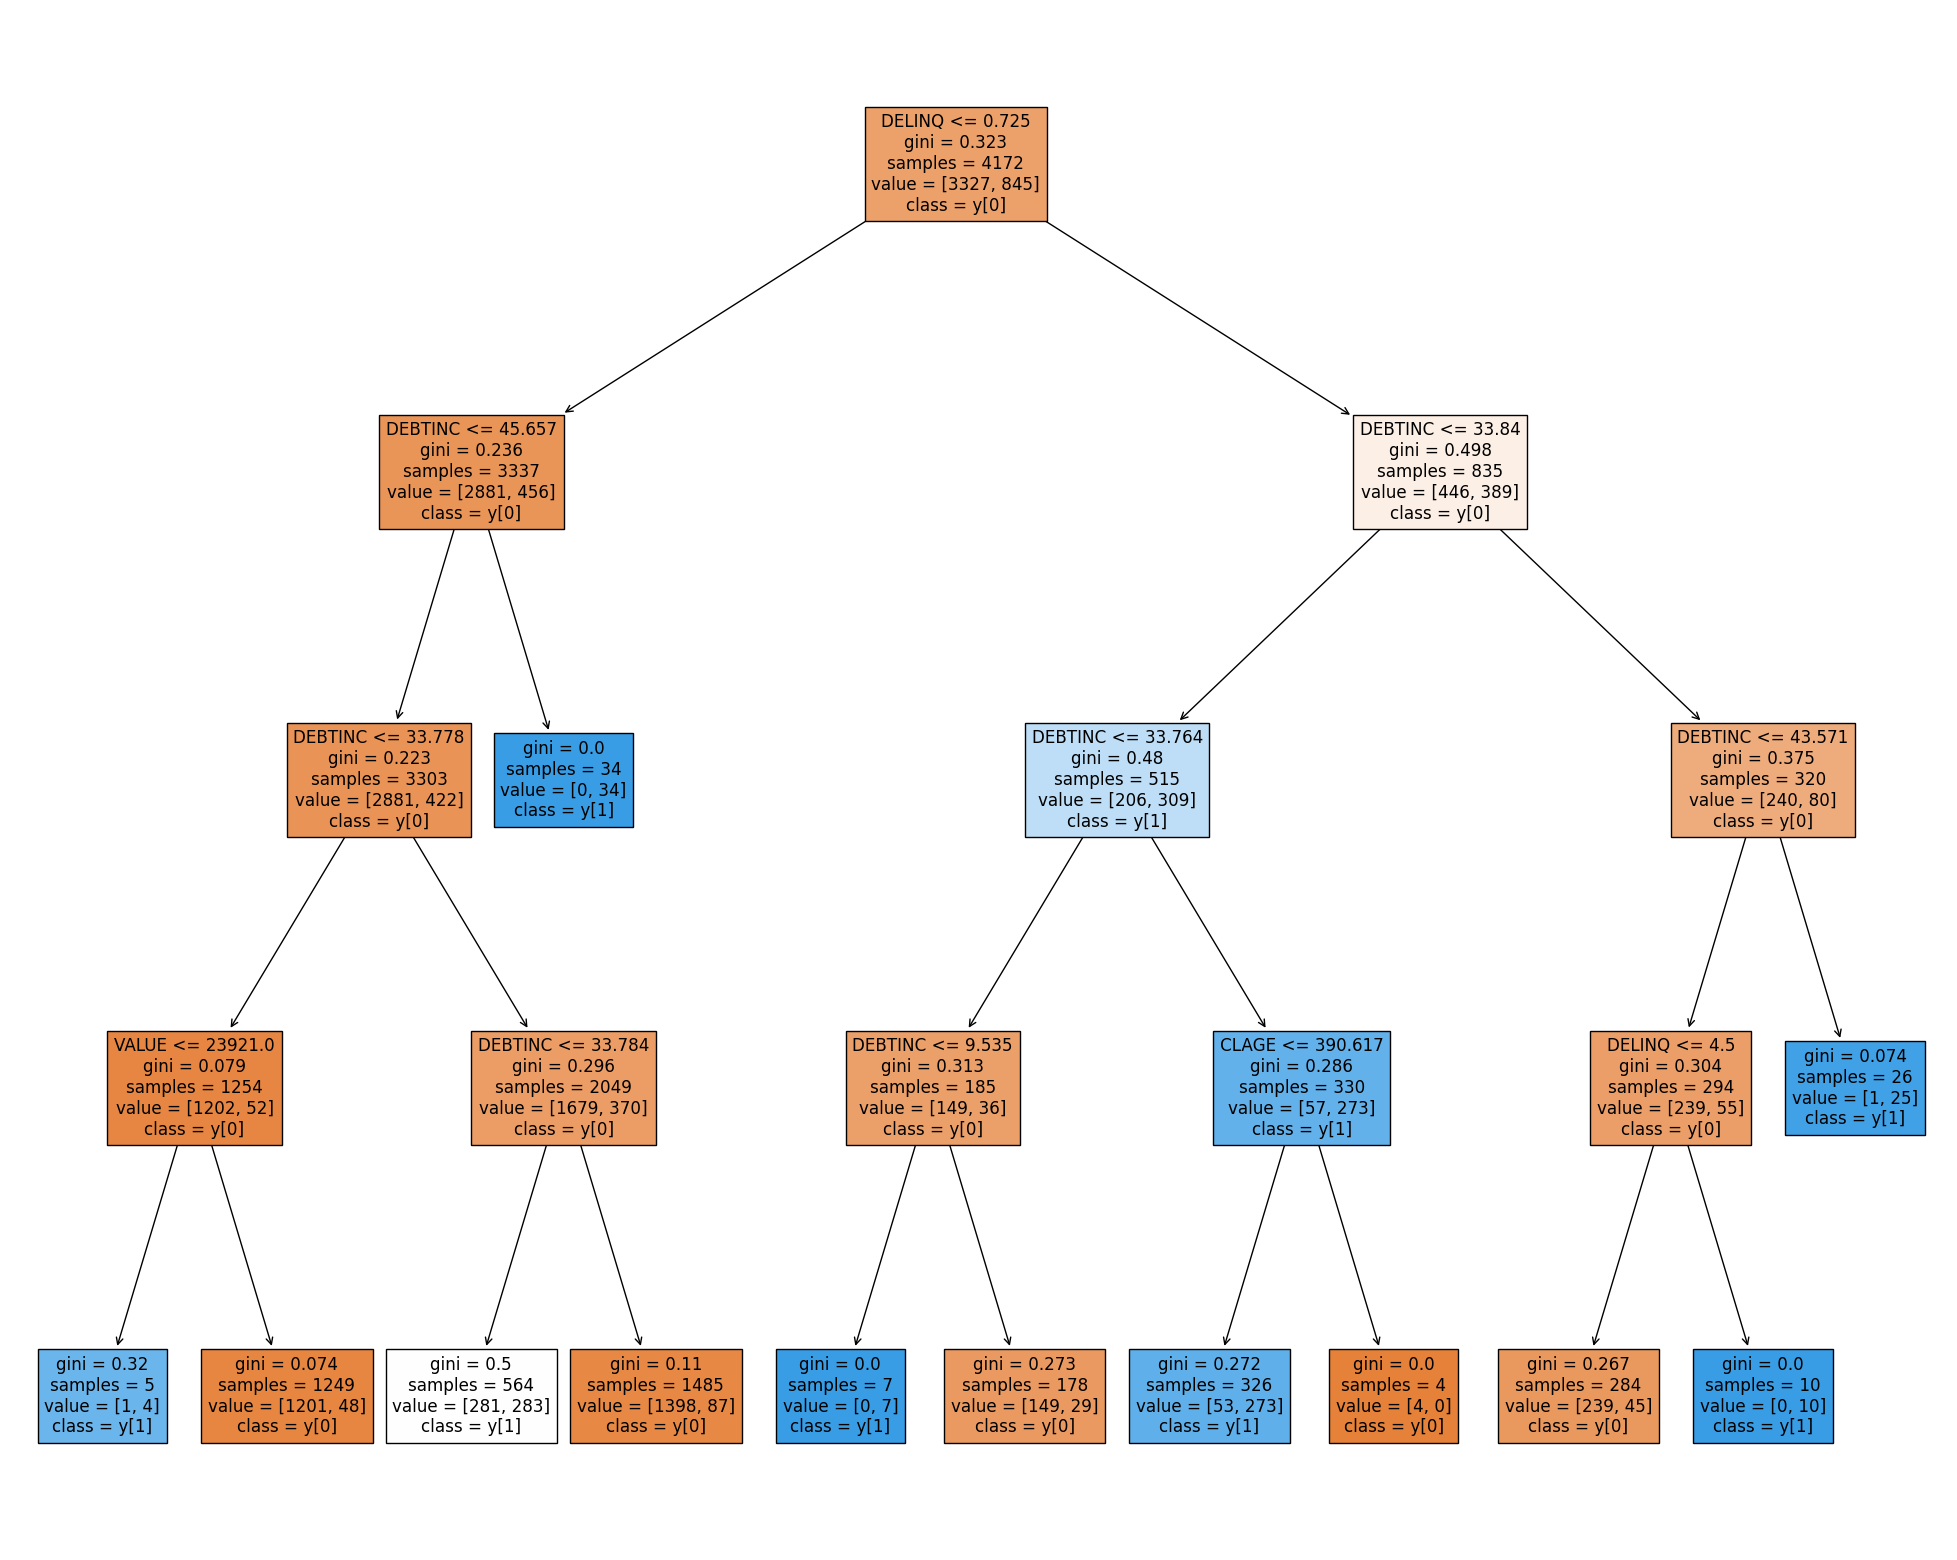

In [ ]:
# visualization of decision tree

from matplotlib import pyplot as plt

plt.figure(figsize=[25,20])
tree.plot_tree(dtree,
               feature_names=list(X_train.columns.values),
               class_names=True,
               filled=True) # paint nodes to indicate majority class for classification
plt.show()

In [ ]:
# tree 2 pruning
from sklearn import tree
from sklearn.tree import export_text

dtree2 = tree.DecisionTreeClassifier()
dtree2 = dtree2.fit(X_train,y_train)

r2 = export_text(dtree2, feature_names=list(X_train.columns.values))
print(r2)


|--- DELINQ <= 0.72
|   |--- DEBTINC <= 45.66
|   |   |--- DEBTINC <= 33.78
|   |   |   |--- VALUE <= 23921.00
|   |   |   |   |--- JOB_ProfExe <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- JOB_ProfExe >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- VALUE >  23921.00
|   |   |   |   |--- LOAN <= 2250.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- LOAN >  2250.00
|   |   |   |   |   |--- NINQ <= 12.00
|   |   |   |   |   |   |--- DEROG <= 8.00
|   |   |   |   |   |   |   |--- YOJ <= 5.50
|   |   |   |   |   |   |   |   |--- MORTDUE <= 138390.50
|   |   |   |   |   |   |   |   |   |--- MORTDUE <= 37346.50
|   |   |   |   |   |   |   |   |   |   |--- DEBTINC <= 30.07
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- DEBTINC >  30.07
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- MORTDUE >  37346.50
|   |   |  

In [ ]:
# generate ccp_alphas and impurities for pruning
path = dtree2.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities  # ccp.alpha: control the size of the tree


# Train a decision tree using different alpha values (complexity parameters)
dtree2s = []
for ccp_alpha in ccp_alphas:
    dtree2 = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    dtree2.fit(X_train, y_train)
    dtree2s.append(dtree2)


In [ ]:
# model evaluation based on the validation data set
train_scores = [dtree2.score(X_train, y_train) for dtree2 in dtree2s]
validation_scores = [dtree2.score(X_val, y_val) for dtree2 in dtree2s]

print(validation_scores)
print(ccp_alphas)


[0.8752796420581656, 0.8752796420581656, 0.8752796420581656, 0.8752796420581656, 0.8752796420581656, 0.8747203579418344, 0.8747203579418344, 0.8752796420581656, 0.8752796420581656, 0.8752796420581656, 0.8747203579418344, 0.8747203579418344, 0.8752796420581656, 0.8752796420581656, 0.8752796420581656, 0.8752796420581656, 0.8752796420581656, 0.8763982102908278, 0.8758389261744967, 0.8758389261744967, 0.8758389261744967, 0.8769574944071589, 0.8769574944071589, 0.8769574944071589, 0.87751677852349, 0.8780760626398211, 0.8786353467561522, 0.8786353467561522, 0.8786353467561522, 0.8786353467561522, 0.8786353467561522, 0.8786353467561522, 0.8786353467561522, 0.8786353467561522, 0.8786353467561522, 0.8786353467561522, 0.8786353467561522, 0.8780760626398211, 0.8780760626398211, 0.8769574944071589, 0.8758389261744967, 0.8758389261744967, 0.8758389261744967, 0.8763982102908278, 0.87751677852349, 0.87751677852349, 0.87751677852349, 0.8769574944071589, 0.8780760626398211, 0.8780760626398211, 0.87807

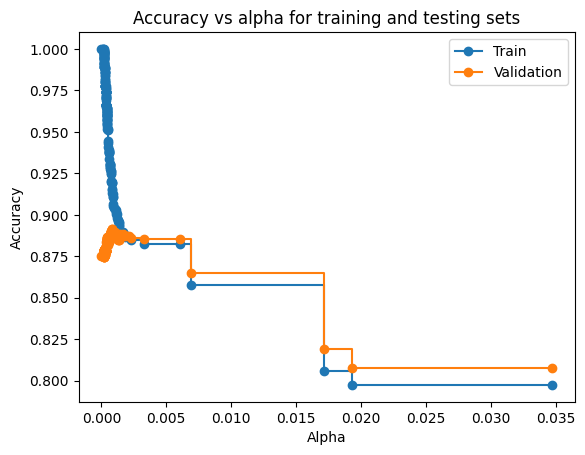

In [ ]:
plt.plot(ccp_alphas, train_scores, marker='o', label='Train', drawstyle="steps-post")
plt.plot(ccp_alphas, validation_scores, marker='o', label='Validation', drawstyle="steps-post")
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs alpha for training and testing sets')
plt.legend()
plt.show()

In [ ]:
accuracy_list = pd.DataFrame(
    {'validation_scores': validation_scores,
     'ccp_alphas': ccp_alphas,
    })

accuracy_list

# alternatively find the max value
accuracy_list[accuracy_list['validation_scores']==accuracy_list['validation_scores'].max()]


,validation_scores,ccp_alphas
144,0.891499,0.000809
145,0.891499,0.000837


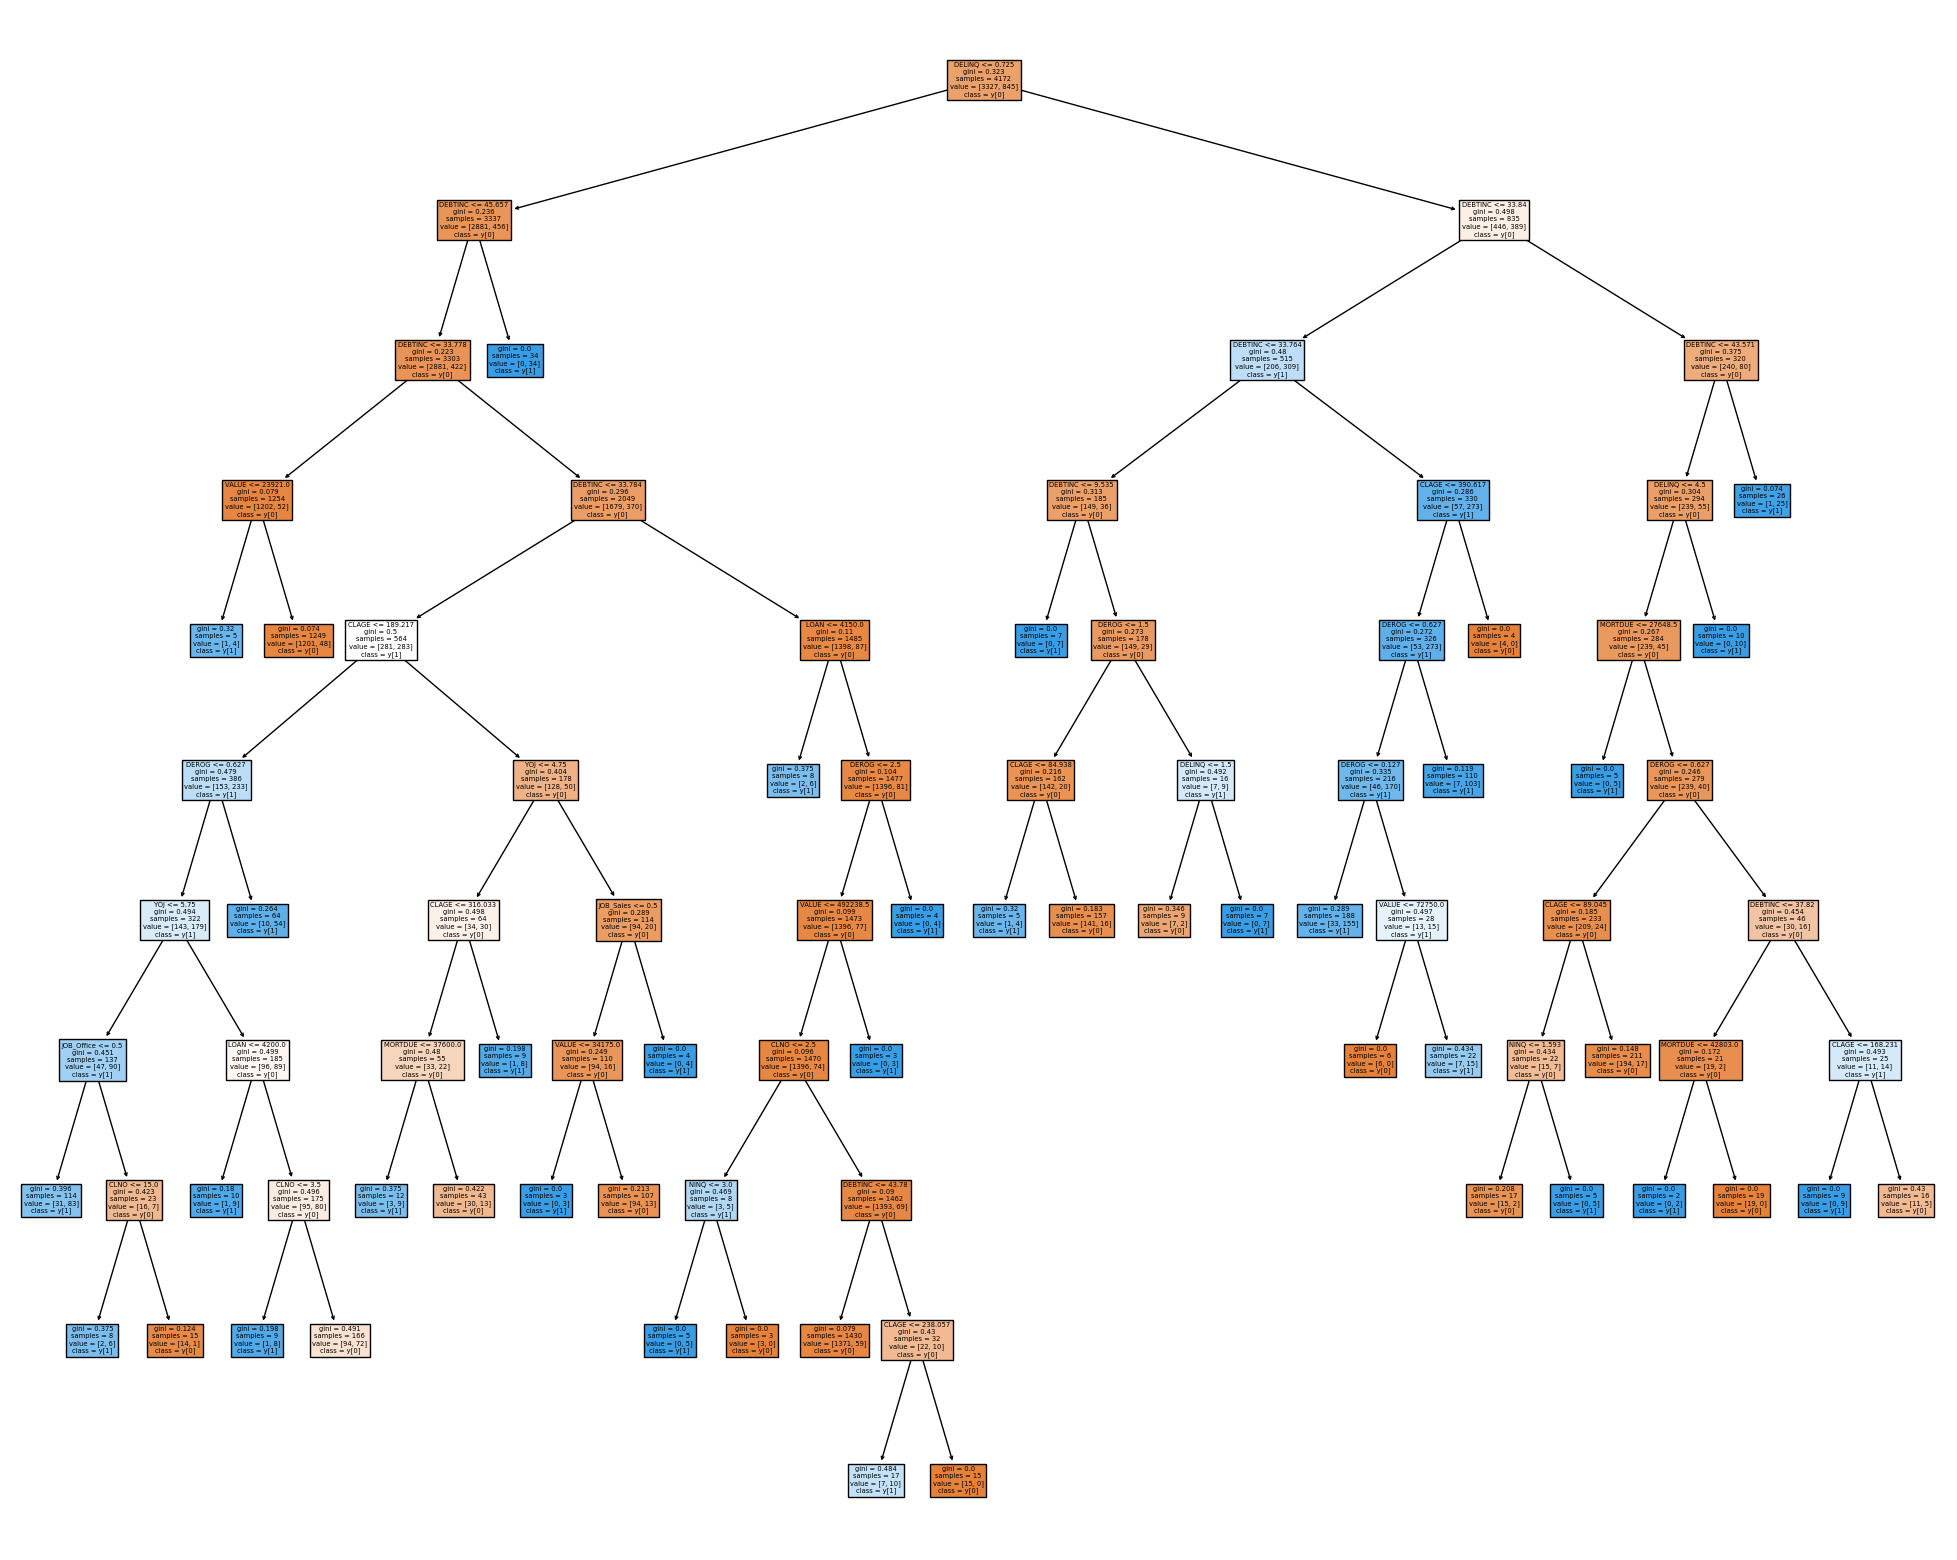

In [ ]:
dtree2 = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.000837)
dtree2 = dtree2.fit(X_train,y_train)

plt.figure(figsize=[25,20])
tree.plot_tree(dtree2,
               feature_names=list(X_train.columns.values),
               class_names=True,
               filled=True)
plt.show()

0.8914988814317674
0.878996086452361


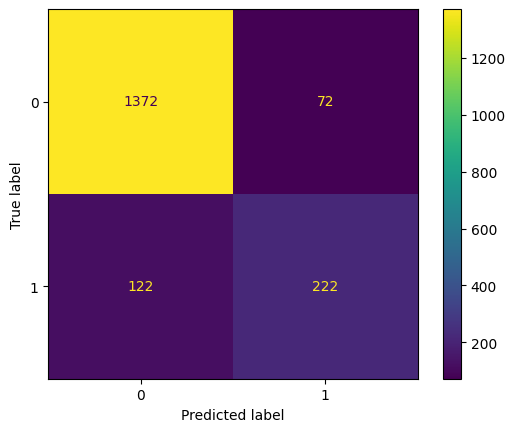

In [ ]:
# model performance - confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, roc_auc_score

prediction2 = dtree2.predict(X_val)

# confusion matrix
cm = confusion_matrix(y_val,prediction2) # # row - true value; column - predicted
disp = ConfusionMatrixDisplay(confusion_matrix=cm).plot()

# accuracy
print(dtree2.score(X_val,y_val))

# specificity
tn, fp, fn, tp = confusion_matrix(y_val, prediction2).ravel()
specificity = tn / (tn+fp)
# print(specificity)

# roc curve
prediction_prob = dtree2.predict_proba(X_val)
dt_auc = roc_auc_score(y_val, prediction_prob[:,1])
print(dt_auc)